# Overview GPT-4.5

A OpenAI introduziu o GPT-4.5, prometendo melhorias em relação às versões anteriores. Para avaliar a eficácia e a viabilidade desse novo modelo, realizei um estudo comparativo, no qual analisei o desempenho do GPT-4.5 em relação a outros modelos. Em alguns experimentos, utilizei não apenas modelos da OpenAI, mas também de outras empresas, como Google e DeepSeak.

Todas as análises são baseadas em experiências reais do meu uso, levando em conta fatores como velocidade de resposta, qualidade das respostas, custo operacional e adaptabilidade a diferentes cenários.

Este experimento tem como objetivo não apenas avaliar métricas técnicas, mas também relatar percepções e desafios encontrados no uso. Quero oferecer uma visão prática e fundamentada sobre se o GPT-4.5 realmente compensa ser adotado em aplicações de produção ou indicado para uso.

In [18]:
# Install dependencies
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### .env

Este LAB requer que as seguintes variáveis de ambiente sejam configuradas antes da execução:

- `OPENAI_API_KEY`: Sua chave de API para acessar os serviços da OpenAI.
- `GEMINI_API_KEY`: Sua chave de API para acessar os serviços da Gemini.
- `AZURE_OPENAI_API_KEY`: Sua chave de API para acessar os serviços da Azure AI services.
- `DEEP_ENDPOINT`: O endpoint para seu modelo ou serviço de deep learning do Azure AI services.
- `OPENAI_API_VERSION`: A versão da API da OpenAI que você está usando (por exemplo, "2024-05-01-preview").

Certifique-se de que essas variáveis de ambiente estejam devidamente configuradas no seu ambiente para executar o script com sucesso.

**DeepSeak (LAB Azure AI foundry)**

**Gemini (LAB google studio)**

**Openai (Plataform openai)**


In [1]:
#libs
from openai import OpenAI
from openai import AzureOpenAI
from dotenv import load_dotenv
import time
import json
from google import genai
import os
import matplotlib.pyplot as plt
import base64
import pandas as pd
import re
import json


# Latência de resposta

In [20]:
# Data
Result_execution_time = {
    "Model": {}
}

In [21]:
# time of execution model openai
def gpt_completation_time_response(model: str, message: str):
    Result_execution_time["Model"][f"{model}"] = []
    for i in range(5):
        start_time = time.time()
        client = OpenAI()
        completion = client.chat.completions.create(
            model=f"{model}",
            store=True,
            messages=[
                {"role": "user", "content": f"{message}"},
            ]
        )
        completion
        end_time = time.time()
        #print(f"Tempo de resposta: {end_time - start_time} segundos para o modelo {model} na tentativa {i+1}")
        Result_execution_time["Model"][f"{model}"].append(end_time - start_time)

    return Result_execution_time

In [22]:
#time of execution model google
load_dotenv()
def gemini_completation_time_response(model: str, message: str):
    Result_execution_time["Model"][f"{model}"] = []
    GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
    client = genai.Client(api_key=f"{GEMINI_API_KEY}")
    for i in range(5):
        start_time = time.time()
        response = client.models.generate_content(
            model=f"{model}",
            contents=[f"{message}"])
        response
        end_time = time.time()
        #print(f"Tempo de resposta: {end_time - start_time} segundos para o modelo {model} na tentativa {i+1}")
        Result_execution_time["Model"][f"{model}"].append(end_time - start_time)

In [23]:
#time of execution model deepseak
load_dotenv()
def deepseak_completation_time_response(model: str, message: str):
    Result_execution_time["Model"][f"{model}"] = []
    for i in range(5):
        start_time = time.time()
        client = AzureOpenAI(
            api_key=os.getenv("AZURE_OPENAI_API_KEY"),
            base_url=os.getenv("DEEP_ENDPOINT"),
            azure_deployment=f"{model}"
        )
        completion = client.chat.completions.create(
            model=f"{model}",
            store=True,
            messages=[
                {"role": "user", "content": f"{message}"},
            ]
        )
        completion
        end_time = time.time()
        #print(f"Tempo de resposta: {end_time - start_time} segundos para o modelo {model} na tentativa {i+1}")
        Result_execution_time["Model"][f"{model}"].append(end_time - start_time)

    return Result_execution_time

In [24]:
#Message
message ="Create a new text for me with theme about the future of technology, content 200 characters"

In [25]:
#Models Google
execution = gemini_completation_time_response("gemini-2.0-flash", message)

In [26]:
#Models OpenAI
execution = gpt_completation_time_response("gpt-4.5-preview", message)
execution = gpt_completation_time_response("gpt-4o", message)
execution = gpt_completation_time_response("gpt-4o-mini", message)
execution = gpt_completation_time_response("o1-mini", message)

In [27]:
#Model DeepSeek
execution = deepseak_completation_time_response("DeepSeek-R1", message)

In [28]:
# Result json
print(json.dumps(Result_execution_time, indent=4))

{
    "Model": {
        "gemini-2.0-flash": [
            1.5842039585113525,
            1.2731468677520752,
            0.8950738906860352,
            0.9370110034942627,
            1.327901840209961
        ],
        "gpt-4.5-preview": [
            4.597270965576172,
            2.924746036529541,
            2.2848291397094727,
            2.358726978302002,
            2.0481619834899902
        ],
        "gpt-4o": [
            1.7368662357330322,
            1.6119720935821533,
            1.7699878215789795,
            1.7390358448028564,
            2.013923168182373
        ],
        "gpt-4o-mini": [
            0.8530941009521484,
            0.9568779468536377,
            0.9833369255065918,
            2.2093958854675293,
            1.0701229572296143
        ],
        "o1-mini": [
            6.047223806381226,
            3.2579410076141357,
            2.960676670074463,
            3.6576430797576904,
            4.76725697517395
        ],
        "DeepSeek

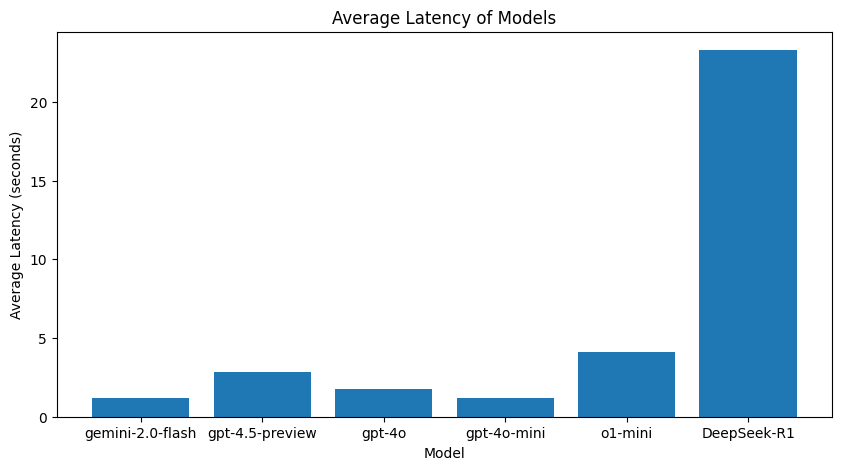

In [29]:
#Plot graph with the results of average latency of model

# Calculate the average latency for each model
average_latency = {model: sum(times) / len(times) for model, times in Result_execution_time["Model"].items()}

# Plot the results
plt.figure(figsize=(10, 5))
plt.bar(average_latency.keys(), average_latency.values())
plt.xlabel('Model')
plt.ylabel('Average Latency (seconds)')
plt.title('Average Latency of Models')
plt.show()

## A OpenAI não afirmou que ele fosse mais rápido

A OpenAI não fez declarações públicas ou em seu site que fosse específica sobre melhorias de velocidade no GPT-4.5. Nos testes que executei no playground da plataforma OpenAI, ele apresentou um ótimo desempenho. Comento mais sobre isso na próxima seção. Em relação à latência, é importante que os modelos possam responder rapidamente para manter uma conversa ágil. No entanto, mesmo não sendo o mais rápido, o GPT-4.5 compensou a espera com a qualidade das respostas. Se analisarmos o gráfico, estamos falando de uma diferença média de 1 ou 2 segundos em relação ao GPT-4o. Do ponto de vista do usuário, essa diferença não é muito perceptível em tarefas que não exigem tanta agilidade do modelo.

# Análise das respostas

O novo modelo GPT4.5 é um modelo geral e não especialista em determinado temas, então é esperado que ele seja bom no sentido de ser multimodal, conseguindo realizar qualquer tarefa sem dificuldade, como responder simples perguntas, perguntas complexas, realizar codificação, cálculos de acordo com sua capacidade e etc

**Bechmark do modelo em comparação com outros modelos da OpenAI:**

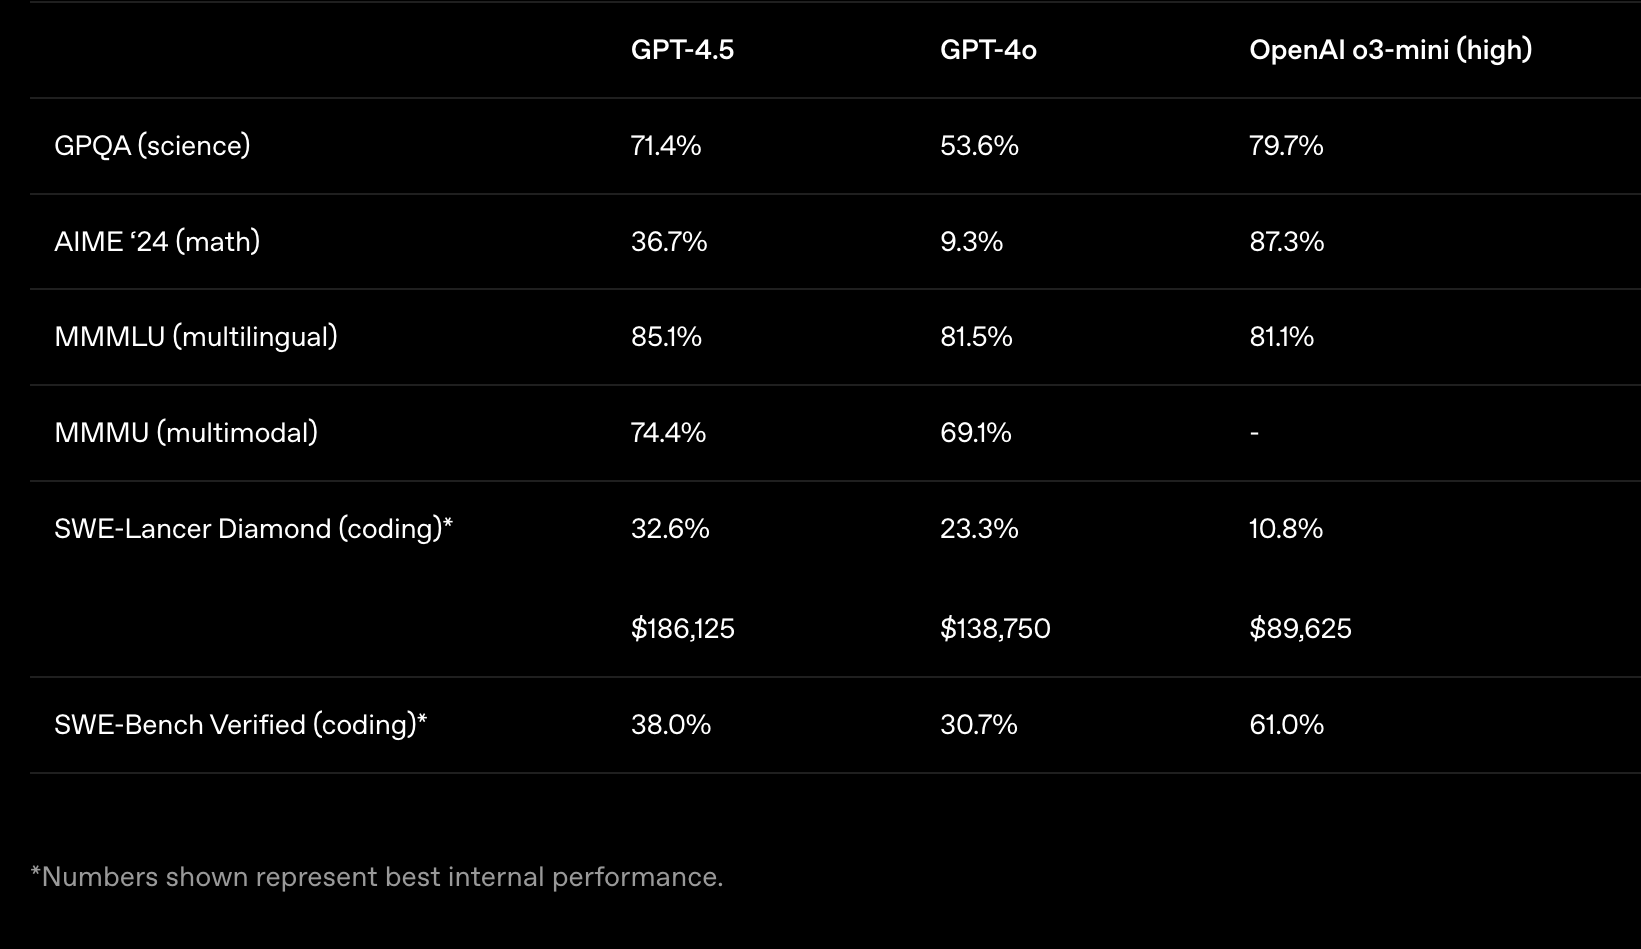

### Conversação

In [6]:
#Chat completation
def completation(model: str, message: str):
    client = OpenAI()
    completion = client.chat.completions.create(
        model=f"{model}",
        store=True,
        messages=[
            {"role": "system", "content": "ever return response in portuguese br e structured in markdown"},
            {"role": "user", "content": f"{message}"},
        ]
    )
    return completion.choices[0].message.content

In [39]:
#Message
message = "Im going through a tough time after failing a test"

In [40]:
#Response
response_4_5 = completation("gpt-4.5-preview", message)
print(response_4_5)

## 😞 Sinto muito que você esteja passando por esse momento difícil.

É compreensível se sentir triste ou frustrado após não alcançar um resultado esperado. Lembre-se que **uma prova não define quem você é nem determina o seu valor**. Momentos difíceis são oportunidades de crescimento e aprendizado.

### Algumas sugestões que podem ajudar nesse momento:

- **Aceite e reconheça os sentimentos**: permitir-se sentir está tudo bem.
- **Tire um tempo pra você descansar ou fazer algo que você goste**.
- **Converse sobre o que está sentindo com familiares, amigos ou alguém próximo que confie**.
- **Analise o que ocorreu** — após um tempo leve — para aprender com a experiência.
- **Trace pequenas metas para melhorar o desempenho próximo, caso queira tentar novamente**.

Você é capaz, merece respeito e apoio, e lembre-se de que todos nós passamos por dificuldades em algum momento da vida.  
**Não está sozinho(a)** nessa, conte comigo se precisar conversar mais.


In [41]:
#Response
response_4_o = completation("gpt-4o", message)
print(response_4_o)

Sinto muito por você estar passando por isso. Aqui estão algumas ideias que podem ajudar:

### Reflexão e Aprendizado

1. **Analise seus erros**: Tire um tempo para entender onde você errou e o que pode melhorar para a próxima vez.
2. **Peça Feedback**: Converse com seu professor sobre como melhorar e quais áreas precisam de mais atenção.

### Cuidado Pessoal

1. **Descanse**: Tire um tempo para relaxar e recuperar. O estresse pode afetar seu desempenho e bem-estar.
2. **Pratique a autocompaixão**: Todos falham em algum momento. Seja gentil consigo mesmo e lembre-se de que errar é uma oportunidade de crescimento.

### Planejamento

1. **Reorganize seu estudo**: Crie um plano de estudo que inclua tempo para revisar o material e fazer exercícios práticos.
2. **Estabeleça metas realistas**: Divida o conteúdo em partes menores e defina objetivos que sejam alcançáveis.

### Procure Apoio

1. **Converse com alguém de confiança**: Às vezes, compartilhar suas preocupações e sentimentos pode al

## Comparação

### Humanização:

**GPT-4.5:** Utiliza uma linguagem mais acolhedora e motivacional, com frases como "Não desanime" e "Conte comigo para o que precisar! 🌟".

**GPT-4o:** Embora também seja empático, a linguagem é mais direta e menos emocional.

### Estrutura:

**GPT-4.5:** Apresenta uma estrutura mais simples e direta, com foco em motivar e dar passos práticos.

**GPT-4o:** Fornece uma análise mais detalhada e estruturada, com seções claras para análise e estratégias futuras.

### Encerramento:

**GPT-4.5:** Termina com uma nota de apoio pessoal e um emoji, reforçando a conexão emocional.

**GPT-4o:** Encerra com uma mensagem de longo prazo, focando no progresso contínuo.

### Em resumo

O GPT-4.5 oferece uma resposta mais **humanizada** e motivacional, enquanto o GPT-4o é mais analítico e estruturado. Este modelo seria interessante para ser utilizado em chat, por exemplo, pela sua humanização.

Estou enfatizando que ele é mais **humanizado** porque as respostas com o GPT-4.5 são mais naturais. Ninguém responde a uma conversa como "Não estou bem hoje, fui mal na prova" com "Nossa, que triste, vou te passar uma lista com 10 dicas...". O GPT-4o normalmente faz isso, mas com o GPT-4.5 foi diferente; a resposta dele para essa situação foi mais humana.

## Visão

In [36]:
def vision(model: str, image_path: str):
    client = OpenAI()
    with open(image_path, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode("utf-8")

    response = client.chat.completions.create(
        model=f"{model}",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text" : "Describe all details of image, response in portuguese br e structured in markdown" 
                    },
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{encoded_image}"},
                    },
                ],
            }
        ]
    )
    return response.choices[0].message.content

In [38]:
print(vision("gpt-4.5-preview","overview_gpt_4_5/image.png"))

# Descrição Detalhada da Imagem

## Local e Ambiente:
- A imagem parece ter sido capturada na famosa Times Square, em Nova York, Estados Unidos.
- O local é altamente movimentado, com pessoas caminhando pela calçada e veículos circulando pelas vias.
- O céu é ligeiramente nublado, mas a luminosidade geral é intensa devido aos inúmeros painéis luminosos e anúncios.

## Elementos Estruturais:
- A rua principal está bem demarcada com linhas de trânsito.
- Há barreiras de concreto formando uma divisão no centro da via.
- Encontram-se pequenos vasos com plantas na lateral esquerda da rua.

## Veículos:
- Diversos táxis amarelos característicos de Nova York aparecem claramente na imagem.
- Um veículo policial está estacionado no centro da imagem.

## Pessoas:
- Muitos pedestres estão caminhando pela calçada próximo às lojas e aos prédios comerciais.
- Não é possível identificar claramente os indivíduos, apenas sua presença genérica.

## Edifícios:
- Prédios altos e modernos se destacam em to

In [ ]:
print(vision("gpt-4o","/Users/leonardojdss/Desktop/projetos/overview_gpt_4_5/image.png"))

### Descrição da Imagem

#### Contexto
- **Local:** Times Square, Nova York.
- **Cenário:** Área urbana movimentada, conhecida por sua intensa atividade e grandes letreiros luminosos.

#### Elementos Visuais
- **Edifícios:**
  - Arranha-céus ao fundo com diversas fachadas iluminadas.
  - Painéis eletrônicos cobrindo grandes porções dos prédios.

- **Letreiros e Propagandas:**
  - Diversos letreiros coloridos e luminosos exibindo marcas conhecidas, propagandas de shows e produtos.
  - Logotipos e mensagens em cores vibrantes, predominando o amarelo, vermelho e azul.

- **Veículos:**
  - Táxis amarelos característicos de Nova York circulando na rua.
  - Outros carros, inclusive da polícia, visíveis na via.

- **Pessoas:**
  - Pedestres caminham nas calçadas e atravessam a rua ao fundo.
  - A presença de pessoas indica uma cena comum na área, com turistas e moradores.

#### Ambiente
- **Atmosfera:** Vibrante e cheia de energia devido à iluminação intensa dos letreiros e a grande presença 

## Comparação da Visão entre GPT-4.5 e GPT-4o

### Detalhamento e Especificidade

- **GPT-4.5:** Fornece uma descrição mais detalhada e específica, mencionando elementos como marcas de anúncios e detalhes arquitetônicos.
- **GPT-4o:** Oferece uma visão geral clara, mas com menos detalhes específicos.

### Certeza e Clareza

- **GPT-4.5:** Parece ter mais certeza e confiança na descrição, com uma visão mais completa e detalhada.
- **GPT-4o:** Embora claro, é menos detalhado e específico, o que pode dar a impressão de menor certeza.

O GPT-4.5 teve um retorno um pouco mais verboso no detalhamento e especificidade na descrição da imagem, isso faz com que o GPT-4.5 pareça ter uma compreensão mais profunda e precisa das imagens analisadas, mas não percebi muitas diferença que pudesse dizer que a visão gpt-4.5 é pior ou menor que o gpt-4o, ambos performaram bem, estarei utilizando mais da visão na proxíma seção, estarei utilizando o gpt-4o porque acredito que ambos não tiveram mudanças significativas que me faria usar o gpt-4.5 para visão.

## Resolução de provas


In [131]:
# Gabarito
template = {
    "matematica": ["C", "C", "A"],
    "física": ["C", "C"],
    "química": ["C", "A"]
}

#Resultado
result ={
    "GPT-4.5": {
        "matematica": [],
        "física": [],
        "química": []
    },
    "GPT-4o": {
        "matematica": [],
        "física": [],
        "química": []
    }
}

In [133]:
#prompt
prompt = f"Resolva a questão e responda qual é a alternativa correta para a pergunta da questão a seguir:"

In [134]:
def vision_question(model: str, prompt: str, image_path: str):
    client = OpenAI()
    with open(image_path, "rb") as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode("utf-8")

    response = client.chat.completions.create(
        model=f"{model}",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text" : f"{prompt}" 
                    },
                    {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{encoded_image}"},
                    },
                ],
            }
        ]
    )
    return response.choices[0].message.content



### Química

In [135]:
#question 1
describe_image = vision_question("gpt-4o","essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","/Users/leonardojdss/Desktop/projetos/overview_gpt_4_5/question_1_fuvest__quimica_c.png")
print(describe_image)

**Enunciado:**

Para exemplificar probabilidade, um grupo de estudantes fez uma atividade envolvendo química, conforme o procedimento descrito.

Cada estudante recebeu um recipiente contendo 800 mL de água destilada com algumas gotas do indicador de pH alaranjado de metila e soluções de HCl e NaOH em diversas concentrações.

Cada estudante deveria jogar apenas uma vez dois dados, um amarelo e um vermelho, ambos contendo os números de 1 a 6.

- Ao jogar o dado vermelho, o estudante deveria adicionar ao recipiente 100 mL de solução do ácido clorídrico na concentração 10⁻ⁿ mol/L, sendo n o número marcado no dado (por exemplo, se saísse o número 1 no dado, a solução seria de 10⁻¹ mol/L; se saísse 6, a solução seria de 10⁻⁶ mol/L).

- Ao jogar o dado amarelo, o estudante deveria executar o mesmo procedimento, mas substituindo o ácido por NaOH, totalizando assim 1,0 L de solução.

- O estudante deveria observar a cor da solução ao final do experimento.

A professora mostrou a tabela com algu

In [136]:
response_question = completation("gpt-4o", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4o"]["química"].append(response_question)



Para resolver essa questão, vamos precisar entender as condições para que a solução final se torne vermelha.

O alaranjado de metila é um indicador de pH que muda sua cor para vermelho em soluções ácidas, tipicamente abaixo de pH 3,1. Assim, precisamos saber em quais situações o pH resultante da mistura das soluções de HCl e NaOH resultaria em uma solução final ácida o suficiente para ter um pH menor que 3,1, fazendo com que a cor final seja vermelha.

### Solução Passo a Passo:

1. **Jogada dos Dados**: Temos dois eventos, o lançamento do dado vermelho (que determina a concentração de HCl) e o lançamento do dado amarelo (que determina a concentração de NaOH).

2. **Combinações e Equilíbrio**: Cada dado tem 6 faces, resultando em 6x6=36 combinações possíveis. A mistura com solução final vermelha ocorre quando a concentração de H⁺ é superior à de OH⁻, sendo forte o suficiente para tornar o pH menor que 3,1.

3. **Identificando Situações Ácidas**:
   - O dado vermelho determina n para a 

In [137]:
response_question = completation("gpt-4.5-preview", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4.5"]["química"].append(response_question)


### Passo a passo do raciocínio:

#### 1. Entender o problema:

- O indicador utilizado é alaranjado de metila.
- Intervalo aproximado para o alaranjado de metila:
  - pH < 3,1 → vermelho (meio ácido)
  - pH entre 3,1 e 4,4 → transição (alaranjado)
  - pH > 4,4 → amarelo (meio básico ou neutro)

Para obter cor **vermelha**, precisamos que a solução final tenha **pH < 3,1**.

---

#### 2. Analisando as misturas possíveis:

Temos inicialmente 800 mL de água destilada (pH neutro ~ 7,0, mas por ser água pura, não há efeito tampão). Depois adiciona-se:

- **100 mL de uma solução diluída de HCl (ácido forte)** em concentração de 10⁻¹ até 10⁻⁶ mol/L.
- **100 mL de uma solução diluída de NaOH (base forte)** em concentração de 10⁻¹ até 10⁻⁶ mol/L.

### **Importância das concentrações usadas:**

| Número no dado | Concentração (mol/L) | Mol em 100 mL (0,1 L) |
|---------------:|---------------------:|----------------------:|
|              1 |             10⁻¹     | 10⁻² mol              |
|    

In [138]:
#Questão 2
describe_image = vision_question("gpt-4o","essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","/Users/leonardojdss/Desktop/projetos/overview_gpt_4_5/question_2_fuvest_quimica_a.png")
print(describe_image)

Claro! Aqui está o enunciado e a pergunta da questão:

---

Quando o nosso corpo é lesionado por uma pancada, logo se cria um hematoma que, ao longo do tempo, muda de cor. Inicialmente, o hematoma torna-se avermelhado pelo acúmulo de hemoglobina. Em seguida, surge uma coloração azulada, decorrente da perda do O₂ ligado ao Fe do grupo heme. Essa coloração torna-se, então, esverdeada (biliverdina) e, após isso, surge um tom amarelado na pele (bilirrubina). Essa sequência de cores ocorre pela transformação do grupo heme da hemoglobina, como representado a seguir:

[Imagens: Estruturas químicas do grupo heme, biliverdina e bilirrubina]

Com base nas informações e nas representações, é correto afirmar:

(A) A conversão da biliverdina em bilirrubina ocorre por meio de uma redução.
(B) A biliverdina, assim como a hemoglobina, é capaz de transportar O₂ para as células do corpo, pois há oxigênio ligado na molécula.
(C) As três estruturas apresentadas contêm o grupo funcional amida.
(D) A degrad

In [139]:
response_question = completation("gpt-4o", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4o"]["química"].append(response_question)


Para resolvermos essa questão, vamos analisar cada uma das alternativas com base na transformação química do grupo heme em biliverdina e depois em bilirrubina.

### Análise das Alternativas:

**(A) A conversão da biliverdina em bilirrubina ocorre por meio de uma redução.**

- **Verdadeiro:** A biliverdina é convertida em bilirrubina através de um processo de redução, que envolve a adição de elétrons, diminuindo assim o estado de oxidação (reduzindo uma dupla ligação C=O a um grupo C-OH, por exemplo).

**(B) A biliverdina, assim como a hemoglobina, é capaz de transportar O₂ para as células do corpo, pois há oxigênio ligado na molécula.**

- **Falso:** A biliverdina não é capaz de transportar oxigênio; esta função é específica da hemoglobina devido à presença do ferro (Fe) no grupo heme.

**(C) As três estruturas apresentadas contêm o grupo funcional amida.**

- **Falso:** Nenhuma das três estruturas (grupo heme, biliverdina e bilirrubina) contém o grupo funcional amida. O grupo funciona

In [140]:
response_question = completation("gpt-4.5-preview", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4.5"]["química"].append(response_question)


## Resolução da questão passo a passo:

1. **Análise das informações:**  
   O hematoma se forma e muda progressivamente de coloração devido ao rompimento e transformação da hemoglobina liberada pelas hemácias. Este processo ocorre assim:
   - Primeiro, o grupo heme da hemoglobina (vermelho forte e oxigenado) é liberado.
   - Perdendo o oxigênio ligado ao ferro (Fe), surge coloração azulada (desoxiemoglobina).
   - Posteriormente, o heme é convertido em biliverdina (verde) e em seguida em bilirrubina (amarela).

2. **Analisando as alternativas:**

   **(A)** *"A conversão da biliverdina em bilirrubina ocorre por meio de uma redução."*  
   Sim, essa afirmação é correta. O processo químico de transformação da **biliverdina em bilirrubina** é uma redução (entrada de hidrogênios), já que existe variação na quantidade de oxigênios e hidrogênios ligados à estrutura.

   **(B)** *"A biliverdina, assim como a hemoglobina, é capaz de transportar O₂ para as células do corpo, pois há oxigênio li

## Matemática


In [141]:
#Questão 1
describe_image = vision_question("gpt-4o","essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","/Users/leonardojdss/Desktop/projetos/overview_gpt_4_5/question_1_fuvest_mat_c.png")
print(describe_image)

A função \( E \) de Euler determina, para cada número natural \( n \), a quantidade de números naturais menores do que \( n \) cujo máximo divisor comum com \( n \) é igual a 1. Por exemplo, \( E(6) = 2 \) pois os números menores do que 6 com tal propriedade são 1 e 5. Qual o valor máximo de \( E(n) \), para \( n \) de 20 a 25?

(A) 19  
(B) 20  
(C) 22  
(D) 24  
(E) 25


In [142]:
response_question = completation("gpt-4o", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4o"]["matematica"].append(response_question)


Para resolver essa questão, precisamos calcular a função totiente de Euler \( E(n) \) para cada número \( n \) do intervalo de 20 a 25 e identificar qual deles possui o maior valor de \( E(n) \).

### Passo a Passo:

A função \( E(n) \) é definida como a quantidade de inteiros positivos menores ou iguais a \( n \) que são coprimos a \( n \). Uma maneira eficiente de calcular \( E(n) \) é usar a fórmula:

\[
E(n) = n \left(1 - \frac{1}{p_1}\right) \left(1 - \frac{1}{p_2}\right) \cdots \left(1 - \frac{1}{p_k}\right)
\]

onde \( p_1, p_2, \ldots, p_k \) são os fatores primos de \( n \).

### Cálculos:

1. **\( n = 20 \):**
   - Fatores primos: 2 e 5
   - \( E(20) = 20 \left(1 - \frac{1}{2}\right)\left(1 - \frac{1}{5}\right) = 20 \times \frac{1}{2} \times \frac{4}{5} = 8 \)

2. **\( n = 21 \):**
   - Fatores primos: 3 e 7
   - \( E(21) = 21 \left(1 - \frac{1}{3}\right)\left(1 - \frac{1}{7}\right) = 21 \times \frac{2}{3} \times \frac{6}{7} = 12 \)

3. **\( n = 22 \):**
   - Fatores primos: 

In [143]:
response_question = completation("gpt-4.5-preview", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4.5"]["matematica"].append(response_question)


### Primeiramente, vamos analisar os valores pedidos:

Para cada número entre \( 20 \) e \( 25 \), determinamos a quantidade de números menores que ele que são coprimos com ele:

- \( n = 20 \):  
\( 20 = 2^2 \times 5 \)  
Utilizando a função de Euler:  
\[
E(20) = 20\left(1 - \frac{1}{2}\right)\left(1 - \frac{1}{5}\right) = 20 \times \frac{1}{2} \times \frac{4}{5} = 8
\]

- \( n = 21 \):  
\( 21 = 3 \times 7 \)  
\[
E(21) = 21\left(1 - \frac{1}{3}\right)\left(1 - \frac{1}{7}\right) = 21 \times \frac{2}{3} \times \frac{6}{7} = 12
\]

- \( n = 22 \):  
\( 22 = 2 \times 11 \)  
\[
E(22) = 22\left(1 - \frac{1}{2}\right)\left(1 - \frac{1}{11}\right) = 22 \times \frac{1}{2} \times \frac{10}{11} = 10
\]

- \( n = 23 \): como \( 23 \) é primo, temos:  
\[
E(23) = 23 - 1 = 22
\]

- \( n = 24 \):  
\( 24 = 2^3 \times 3 \)  
\[
E(24) = 24\left(1 - \frac{1}{2}\right)\left(1 - \frac{1}{3}\right) = 24 \times \frac{1}{2} \times \frac{2}{3} = 8
\]

- \( n = 25 \):  
\( 25 = 5^2 \)  
\[
E(25) = 25\lef

In [144]:
#Questão 2
describe_image = vision_question("gpt-4o","essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","/Users/leonardojdss/Desktop/projetos/overview_gpt_4_5/question_2_ita_mat_c.png")
print(describe_image)

Dizemos que a representação binária de um número \( N \in \mathbb{N} \) da forma

\[ N = g \cdot 2^0 + f \cdot 2^1 + e \cdot 2^2 + d \cdot 2^3 + c \cdot 2^4 + b \cdot 2^5 + a \cdot 2^6 \]

é \((abcdefg)_2\), onde \( a, b, c, d, e, f, g \in \{0, 1\} \) e omitem-se os algarismos 0 até o primeiro algarismo 1 da esquerda para a direita. Seja \( k \) um número inteiro tal que \( 1 \leq k \leq 100 \). Qual a probabilidade de \( k \) e \( k + 1 \) terem representações binárias com um número distinto de algarismos?

a) 2%

b) 4%

c) 6%

d) 8%

e) 10%


In [145]:
response_question = completation("gpt-4o", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4o"]["matematica"].append(response_question)


Para resolver essa questão, precisamos entender sob quais condições dois números consecutivos, \( k \) e \( k + 1 \), terão representações binárias com um número diferente de algarismos.

### Análise

Um número \( k \) e \( k + 1 \) terão representações binárias com um diferente número de algarismos se a adição de 1 ao número \( k \) resultar em um "overflow" na representação binária, ou seja, quando o número \( k + 1 \) requerer um bit extra em comparação com \( k \).

Isso acontece precisamente quando \( k \) é da forma \( 2^n - 1 \), para algum \( n \geq 1 \). Nessas situações, \( k \) tem a forma binária \((111...1)_2\) (com \( n \) bits), e \( k + 1 \) tem a forma binária \((1000...0)_2\) (com \( n+1 \) bits).

### Identificando os valores de \( k \)

Dentro do intervalo \( 1 \leq k \leq 100 \), precisamos achar todos os \( n \) tais que:

\[
2^n - 1 \leq 100
\]

Testando valores de \( n \):

- Para \( n = 1 \): \( 2^1 - 1 = 1 \)
- Para \( n = 2 \): \( 2^2 - 1 = 3 \)
- Para \( n =

In [146]:
response = completation("gpt-4.5-preview", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4.5"]["matematica"].append(response_question)


Para resolver essa questão, precisamos entender sob quais condições dois números consecutivos, \( k \) e \( k + 1 \), terão representações binárias com um número diferente de algarismos.

### Análise

Um número \( k \) e \( k + 1 \) terão representações binárias com um diferente número de algarismos se a adição de 1 ao número \( k \) resultar em um "overflow" na representação binária, ou seja, quando o número \( k + 1 \) requerer um bit extra em comparação com \( k \).

Isso acontece precisamente quando \( k \) é da forma \( 2^n - 1 \), para algum \( n \geq 1 \). Nessas situações, \( k \) tem a forma binária \((111...1)_2\) (com \( n \) bits), e \( k + 1 \) tem a forma binária \((1000...0)_2\) (com \( n+1 \) bits).

### Identificando os valores de \( k \)

Dentro do intervalo \( 1 \leq k \leq 100 \), precisamos achar todos os \( n \) tais que:

\[
2^n - 1 \leq 100
\]

Testando valores de \( n \):

- Para \( n = 1 \): \( 2^1 - 1 = 1 \)
- Para \( n = 2 \): \( 2^2 - 1 = 3 \)
- Para \( n =

In [147]:
#Questão 3
describe_image = vision_question("gpt-4o","essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","/Users/leonardojdss/Desktop/projetos/overview_gpt_4_5/question_3_fuvest_mat_a.png")
print(describe_image)

Seja \( (a_n) \) uma progressão aritmética cujo primeiro termo é \( a_1 \) e a razão \( r \), ambos números reais. É possível construir uma outra sequência \( (b_n) \), em que o primeiro termo é um número real \( b_1 \) e com a seguinte lei de formação

\[ b_{n+1} = b_n + a_n \],

sendo \( n > 0 \) um número natural.

Por exemplo, se \( b_1 = 0 \) e

\[ (a_n) = (1,3,5,7,9,11, \ldots) \],

tem-se

\[ (b_n) = (0,1,4,9,16,25, \ldots) \).

Com base em tais informações, os valores de \( a_1 \) e \( r \) foram escolhidos de forma que \( (b_n) \) também seja uma progressão aritmética de razão \( r' \). Nessas condições, é correto afirmar:

(A) \( r' = a_1 \)

(B) \( r' = 2a_1 \)

(C) \( r' = r \)

(D) \( r' = 2r \)

(E) \( r' = b_1 - a_1 \)


In [148]:
response = completation("gpt-4o", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4o"]["matematica"].append(response_question)


Para resolver essa questão, precisamos entender sob quais condições dois números consecutivos, \( k \) e \( k + 1 \), terão representações binárias com um número diferente de algarismos.

### Análise

Um número \( k \) e \( k + 1 \) terão representações binárias com um diferente número de algarismos se a adição de 1 ao número \( k \) resultar em um "overflow" na representação binária, ou seja, quando o número \( k + 1 \) requerer um bit extra em comparação com \( k \).

Isso acontece precisamente quando \( k \) é da forma \( 2^n - 1 \), para algum \( n \geq 1 \). Nessas situações, \( k \) tem a forma binária \((111...1)_2\) (com \( n \) bits), e \( k + 1 \) tem a forma binária \((1000...0)_2\) (com \( n+1 \) bits).

### Identificando os valores de \( k \)

Dentro do intervalo \( 1 \leq k \leq 100 \), precisamos achar todos os \( n \) tais que:

\[
2^n - 1 \leq 100
\]

Testando valores de \( n \):

- Para \( n = 1 \): \( 2^1 - 1 = 1 \)
- Para \( n = 2 \): \( 2^2 - 1 = 3 \)
- Para \( n =

In [149]:
response = completation("gpt-4.5-preview", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4.5"]["matematica"].append(response_question)


Para resolver essa questão, precisamos entender sob quais condições dois números consecutivos, \( k \) e \( k + 1 \), terão representações binárias com um número diferente de algarismos.

### Análise

Um número \( k \) e \( k + 1 \) terão representações binárias com um diferente número de algarismos se a adição de 1 ao número \( k \) resultar em um "overflow" na representação binária, ou seja, quando o número \( k + 1 \) requerer um bit extra em comparação com \( k \).

Isso acontece precisamente quando \( k \) é da forma \( 2^n - 1 \), para algum \( n \geq 1 \). Nessas situações, \( k \) tem a forma binária \((111...1)_2\) (com \( n \) bits), e \( k + 1 \) tem a forma binária \((1000...0)_2\) (com \( n+1 \) bits).

### Identificando os valores de \( k \)

Dentro do intervalo \( 1 \leq k \leq 100 \), precisamos achar todos os \( n \) tais que:

\[
2^n - 1 \leq 100
\]

Testando valores de \( n \):

- Para \( n = 1 \): \( 2^1 - 1 = 1 \)
- Para \( n = 2 \): \( 2^2 - 1 = 3 \)
- Para \( n =

## Física

In [150]:
#Questão 1
describe_image = vision_question("gpt-4o","essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","/Users/leonardojdss/Desktop/projetos/overview_gpt_4_5/question_1_fuvest_fisica_c.png")
print(describe_image)

Claro! Aqui está o enunciado e a pergunta extraídos da imagem:

---

73

A velocidade de escape de um corpo celeste é a mínima velocidade que um objeto deve ter nas proximidades da superfície desse corpo para escapar de sua atração gravitacional. Com base nessa informação e em seus conhecimentos sobre a interpretação cinética da temperatura, considere as seguintes afirmações a respeito da relação entre a velocidade de escape e a atmosfera de um corpo celeste.

I. Corpos celestes com mesma velocidade de escape retêm atmosferas igualmente densas, independentemente da temperatura de cada corpo.

II. Moléculas de gás nitrogênio escapam da atmosfera de um corpo celeste mais facilmente do que moléculas de gás hidrogênio.

III. Comparando corpos celestes com temperaturas médias iguais, aquele com a maior velocidade de escape tende a reter uma atmosfera mais densa.

Apenas é correto o que se afirma em

(A) I.

(B) II.

(C) III.

(D) I e II.

(E) II e III.


In [151]:
response = completation("gpt-4o", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4o"]["física"].append(response_question)


Para resolver essa questão, precisamos entender sob quais condições dois números consecutivos, \( k \) e \( k + 1 \), terão representações binárias com um número diferente de algarismos.

### Análise

Um número \( k \) e \( k + 1 \) terão representações binárias com um diferente número de algarismos se a adição de 1 ao número \( k \) resultar em um "overflow" na representação binária, ou seja, quando o número \( k + 1 \) requerer um bit extra em comparação com \( k \).

Isso acontece precisamente quando \( k \) é da forma \( 2^n - 1 \), para algum \( n \geq 1 \). Nessas situações, \( k \) tem a forma binária \((111...1)_2\) (com \( n \) bits), e \( k + 1 \) tem a forma binária \((1000...0)_2\) (com \( n+1 \) bits).

### Identificando os valores de \( k \)

Dentro do intervalo \( 1 \leq k \leq 100 \), precisamos achar todos os \( n \) tais que:

\[
2^n - 1 \leq 100
\]

Testando valores de \( n \):

- Para \( n = 1 \): \( 2^1 - 1 = 1 \)
- Para \( n = 2 \): \( 2^2 - 1 = 3 \)
- Para \( n =

In [152]:
response = completation("gpt-4.5-preview", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4.5"]["física"].append(response_question)

Para resolver essa questão, precisamos entender sob quais condições dois números consecutivos, \( k \) e \( k + 1 \), terão representações binárias com um número diferente de algarismos.

### Análise

Um número \( k \) e \( k + 1 \) terão representações binárias com um diferente número de algarismos se a adição de 1 ao número \( k \) resultar em um "overflow" na representação binária, ou seja, quando o número \( k + 1 \) requerer um bit extra em comparação com \( k \).

Isso acontece precisamente quando \( k \) é da forma \( 2^n - 1 \), para algum \( n \geq 1 \). Nessas situações, \( k \) tem a forma binária \((111...1)_2\) (com \( n \) bits), e \( k + 1 \) tem a forma binária \((1000...0)_2\) (com \( n+1 \) bits).

### Identificando os valores de \( k \)

Dentro do intervalo \( 1 \leq k \leq 100 \), precisamos achar todos os \( n \) tais que:

\[
2^n - 1 \leq 100
\]

Testando valores de \( n \):

- Para \( n = 1 \): \( 2^1 - 1 = 1 \)
- Para \( n = 2 \): \( 2^2 - 1 = 3 \)
- Para \( n =

In [173]:
#Questão 2
describe_image = vision_question("gpt-4o","essa é uma questão da fuvest, extraia todo o enunciado e a pergunta","/Users/leonardojdss/Desktop/projetos/overview_gpt_4_5/question_2_fuvest_fisica_c.png")
print(describe_image)

Os versos a seguir pertencem à canção *Fall on Me*, da banda norte-americana R.E.M., lançada em 1986.

*"There's a problem, feathers, iron  
Bargain buildings, weights and pulleys  
Feathers hit the ground before the weight can leave the air"*  

Bill Berry, Peter Buck, Mike Mills e Michael Stipe.

A qual episódio (real ou hipotético) da história da física o trecho da música faz alusão?

(A) À queda de uma maçã, que teria inspirado Newton à descoberta da gravitação universal.  
(B) À observação de um pássaro em voo, que teria levado Einstein a formular a teoria da relatividade.  
(C) Aos experimentos com objetos de massas diferentes, que teriam indicado a Galileu os princípios da queda livre.  
(D) Ao transbordamento da água em uma banheira, que teria sugerido a Arquimedes o conceito de empuxo.  
(E) À queda de um bloco de ferro ligado a uma hélice, que teria levado Joule à equivalência entre calor e energia.


In [174]:
response_question = completation("gpt-4o", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4o"]["física"].append(response_question)

A questão apresenta um trecho da música *Fall on Me*, da banda R.E.M., que menciona penas e objetos pesados, em um contexto de queda. Esse tema remete a um famoso experimento mental no campo da física.

A alternativa correta é:

(C) Aos experimentos com objetos de massas diferentes, que teriam indicado a Galileu os princípios da queda livre.

Galileu Galilei, em suas experiências e escritos, discutiu a ideia de que objetos de diferentes massas caem à mesma velocidade na ausência de resistência do ar, desafiando a concepção aristotélica, que afirmava que objetos mais pesados caíam mais rapidamente. A menção a "penas" e "pesos" no trecho da canção alude a esse tipo de experimento comparativo em que, na prática, uma pena cai mais lentamente devido à resistência do ar, mas teoricamente cairia à mesma velocidade que um objeto pesado se não houvesse resistência.


In [175]:
response_question = completation("gpt-4.5-preview", f"{prompt} {describe_image}")
print(response_question)
result["GPT-4.5"]["física"].append(response_question)

### Resolução

Os versos mencionados fazem referência clara ao experimento hipoteticamente atribuído a Galileu Galilei, envolvendo a queda de corpos com diferentes massas, comumente ilustrada com penas (feathers) versus pesos ou blocos de ferro (weights).

Conforme a física moderna esclarece, em um ambiente sem resistência do ar (vácuo), todos os corpos, independentemente da massa, caem com a mesma aceleração gravitacional. No entanto, na atmosfera terrestre, objetos mais leves, como penas, caem mais lentamente devido à resistência do ar. Essa ideia se tornou emblemática graças ao famoso experimento e às conclusões feitas por Galileu ao estudar a queda livre.

### Conclusão

Portanto, a alternativa correta é a seguinte:

**Alternativa (C): Aos experimentos com objetos de massas diferentes, que teriam indicado a Galileu os princípios da queda livre.**


In [ ]:
#resume result
result_example = """
#Resultado
result ={
    "GPT-4.5": {
        "matematica": [INSERIR AQUI AS ALTERNATIVAS NA ORDEM QUE FORAM RESPONDIDAS, EXAMPLE "C", "C", "A", FAZER ISSO PRA TODAS],
        "física": [],
        "química": []
    },
    "GPT-4o": {
        "matematica": [],
        "física": [],
        "química": []
    }
}
"""
resume = completation("gpt-4o", f"A partir de {result} refaça o json seguindo o seguinte exemplo {result_example}, devolver apenas o json")
print(resume)

In [ ]:
json_str = re.search(r'```json\s*(\{.*?\})\s*```', resume, re.DOTALL)
if json_str:
	resume_obj = json.loads(json_str.group(1))
	print(json.dumps(resume_obj, indent=4, ensure_ascii=False))
else:
	print("Could not extract JSON from the resume string")

In [171]:
# Compare the responses in resume_obj with the answer key in template

accuracy = {}
for model, subjects in resume_obj.items():
    model_result = {}
    total_correct = 0
    for subject, answers in subjects.items():
        expected_answers = template[subject]
        correct_count = sum(1 for resp, expected in zip(answers, expected_answers) if resp == expected)
        model_result[subject] = correct_count
        total_correct += correct_count
    model_result["total_score"] = total_correct
    accuracy[model] = model_result

print("Accuracy by model:")
print(json.dumps(accuracy, indent=4, ensure_ascii=False))

Accuracy by model:
{
    "GPT-4.5": {
        "matematica": 2,
        "física": 2,
        "química": 1,
        "total_score": 5
    },
    "GPT-4o": {
        "matematica": 2,
        "física": 2,
        "química": 1,
        "total_score": 5
    }
}


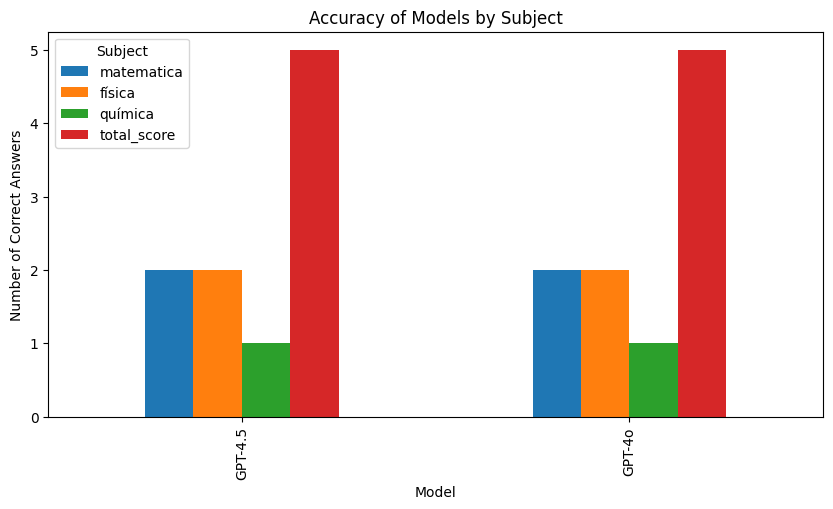

In [172]:
# Convert the accuracy dictionary to a DataFrame
df_accuracy = pd.DataFrame(accuracy).T

# Plot the accuracy results as a bar chart
df_accuracy.plot(kind='bar', figsize=(10, 5))
plt.xlabel('Model')
plt.ylabel('Number of Correct Answers')
plt.title('Accuracy of Models by Subject')
plt.legend(title='Subject')
plt.show()

### Desempenho dos Modelos em Provas Complexas

Ao comparar o desempenho dos modelos GPT-4.5 e GPT-4o na resolução de problemas complexos das provas do ITA e FUVEST, podemos observar que não houve diferença entre os dois. Ambos os modelos apresentaram a mesma pontuação total, conforme detalhado abaixo:

**Accuracy by model:**
```json
{
    "GPT-4.5": {
        "matematica": 2,
        "física": 2,
        "química": 1,
        "total_score": 5
    },
    "GPT-4o": {
        "matematica": 2,
        "física": 2,
        "química": 1,
        "total_score": 5
    }
}
```

Os resultados indicam que tanto o GPT-4.5 quanto o GPT-4o foram igualmente eficazes na resolução de questões de matemática, física e química, obtendo a mesma quantidade de respostas corretas em cada disciplina. Portanto, no meu ponto de vista posso concluir que, para este conjunto específico de problemas, não houve vantagem clara de um modelo sobre o outro.
```

# Custo

### Custo do Modelo GPT 4.5

O GPT-4.5 é oferecido para usuários do ChatGPT via assinatura e pela API. Para utilizar via API, o custo é consideravelmente alto: US$ 75 por milhão de tokens de entrada e US$ 150 por milhão de tokens de saída. Em comparação com o modelo geral multimodal (completation) que anteriormente era o mais caro da OpenAI (GPT-4o), ele é 30 vezes mais caro para tokens de entrada e 15 vezes mais caro para tokens de saída.

### Custo para o Experimento

**GPT-4.5**
- Tokens in + out: 43.955
- Custo: 4,97 USD

**GPT-4o**
- Tokens in + out: 183.806
- Custo: 0,63 USD

**GPT-4o-mini**
- Tokens in + out: 10.652
- Custo: 0,21 USD

**GPT o1-mini**
- Tokens in + out: 8.634
- Custo: 0,06 USD

**Custo Total:** 5,87 USD  
**Tokens In + Out:** 247.047

**Nota:** Google Gemini e DeepSeak não tiveram custo, pois foram utilizados modelos de estúdio, sem custo!


# Conclusão do overview do modelo GPT-4.5

No meu ponto de vista, baseado nos meus testes realizados no playground da OpenAI e neste Jupyter Notebook, o GPT-4.5 é um bom modelo. Ele é o maior modelo da OpenAI, assim como o GPT-4o tambem é um bom modelo. No entanto, não existe inovação neste novo modelo que crie a necessidade de substituir os modelos GPT-4o, GPT-4o-mini, etc., por este novo modelo em suas aplicações de chat, code generator etc. Se você é um assinante do ChatGPT, vale a pena conversar com este modelo e ter uma relação mais **humanizada**.

Eu preciso ser crítico com este novo modelo. Quando estou dizendo ser crítico, não estou dizendo em diminuir o modelo, mas sim em comparar se eu, como um usuário, desenvolvedor ou arquiteto de soluções em IA, devo indicar este novo modelo. O GPT-4.5 tem o objetivo de melhorar a interação dos humanos com a inteligência artificial, como mencionei anteriormente, ser mais **humanizado**. Ele está atualizado para reduzir as "alucinações" (respostas imprecisas ou incorretas) em comparação com versões anteriores. Isso é provado no gráfico disponibilizado pela OpenAI e que inseri neste overview. No meu uso, isso pareceu ser verdade.

Em resumo, o GPT-4.5 foi lançado para oferecer uma experiência de interação mais natural. No entanto, ele tem um alto custo que, no meu ponto de vista, ainda não justifica ser utilizado para tornar os chats mais humanizados, por exemplo. Observe que estou dizendo que ainda não vale a pena. Acredito que ele possa ser barateado quando o GPT-5 for lançado. O próprio Sam Altman deixa claro que este novo modelo realmente é mais caro e acredito que a Openai fazendo esforços para ter uma infra mais robusta e capaz de suportar todos os modelos que disponibilizam.

Em relação ao desempenho, ao comparar o desempenho dos modelos GPT-4.5 e GPT-4o na resolução de problemas complexos das provas do ITA e FUVEST, geração de textos, visão, podemos observar que não houve diferença significantes entre os dois. Ambos os modelos apresentaram bons resultados, o gpt-4o sendo "menos humanizado"e o gpt-4.5 "mais humanizado"